# SAE analysis

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(root_dir)

In [2]:
from src.sae.sae_visualizer import SAEVisualizer
from src.sae.sae_analyzer import SAEAnalyzer

In [3]:
from src.sae.sae_model import SAEModel

In [4]:
from src.activation_dataset import ActivationDataset

In [5]:
CHECKPOINT_DIR = root_dir + '/ckpts/2025-02-13_09-26-08'

## Middle layer

```
Training summary for actor_mlp_3:
  Reconstruction loss: 0.009455
  Sparsity: 0.057258
  Dead features: 2 (0.78%)
  Mean active features per sample: 14.66 (5.73%)
```

In [6]:
layer_name = 'actor_mlp_3'

In [7]:
sae_model = SAEModel.load(os.path.join(CHECKPOINT_DIR, 'sae_models', f'sae_{layer_name}.pkl'))
analyzer = SAEAnalyzer(sae_model)

In [8]:
dataset = ActivationDataset()
dataset.load(os.path.join(CHECKPOINT_DIR, 'strong_activation_dataset.pkl'))

In [9]:
visualizer = SAEVisualizer(sae_model, dataset, layer_name)

In [11]:
feature_data = analyzer.extract_feature_data(dataset, layer_name)

Model hidden dimension: 256
Feature vectors shape: (256, 128)
Activation stats mean shape: (256,)


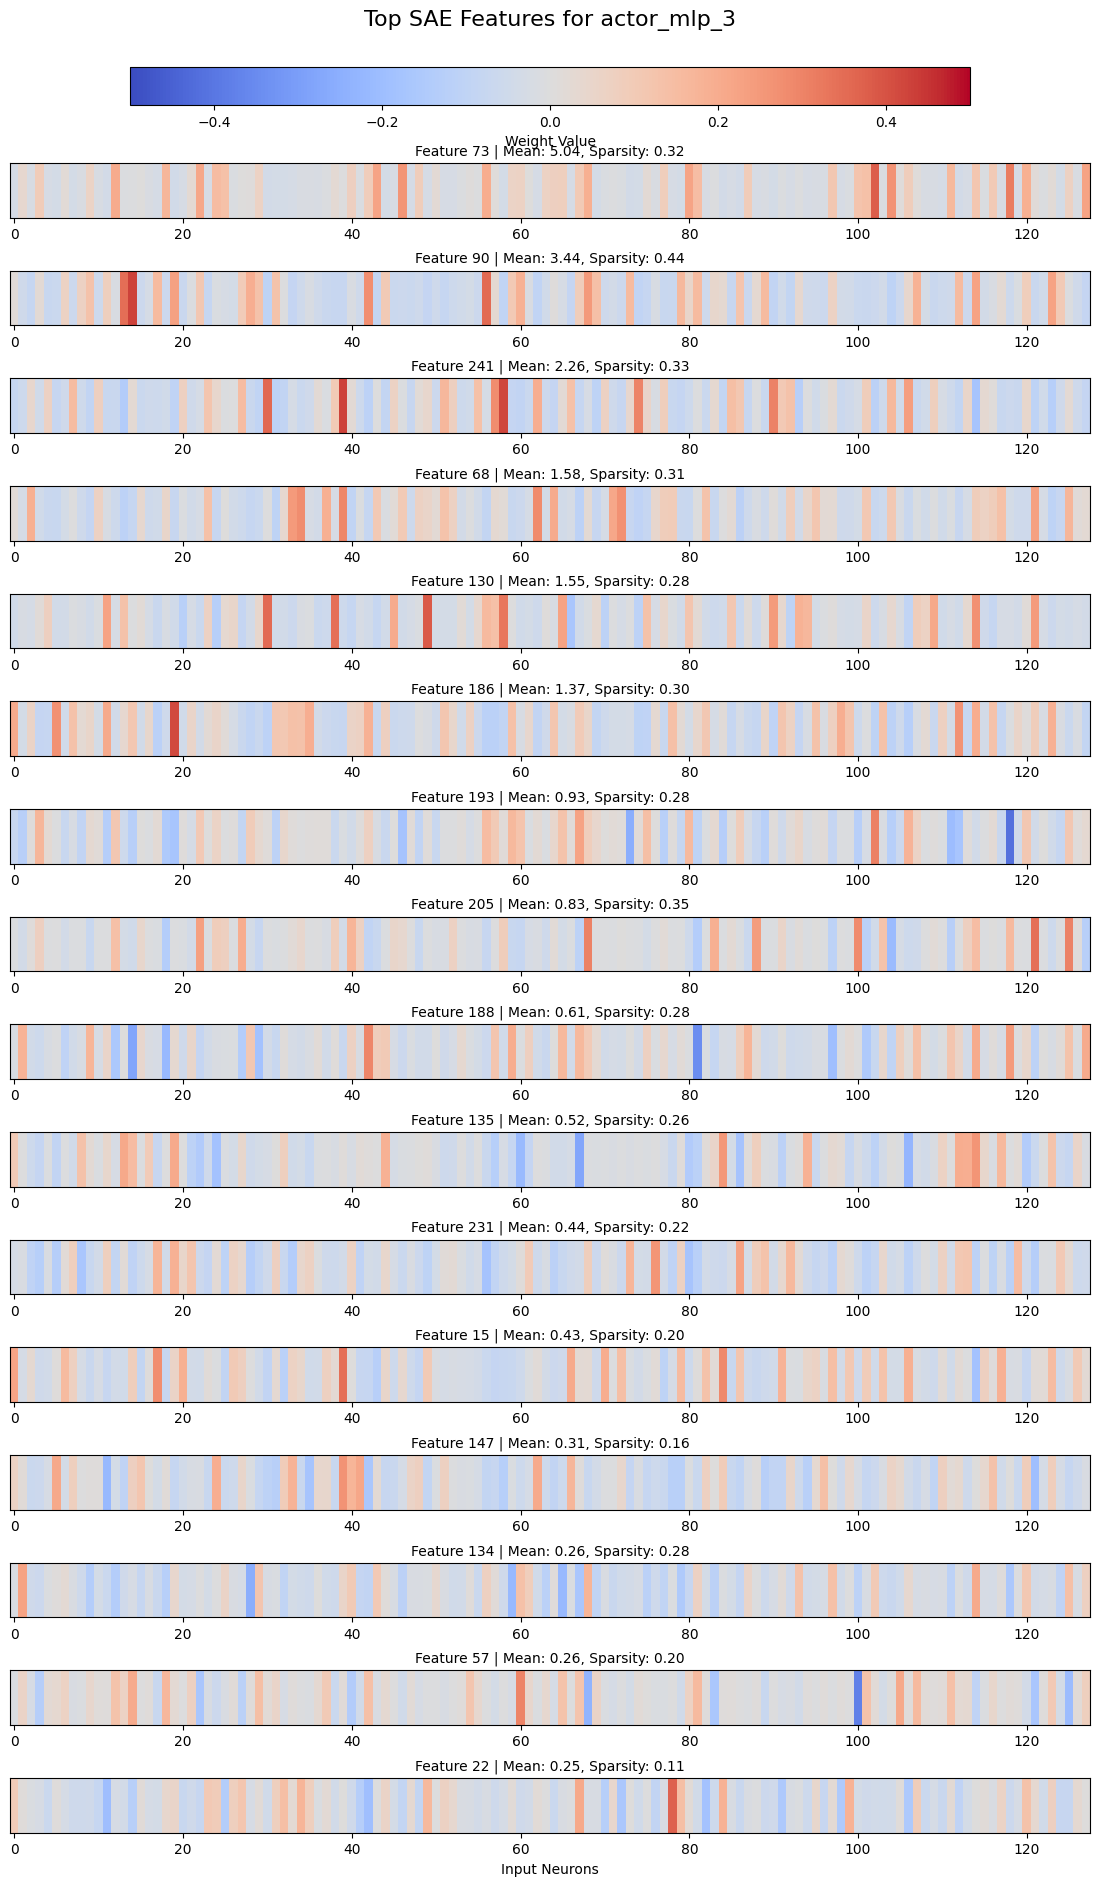

In [12]:
fig = visualizer.visualize_features(feature_data=feature_data, top_k=16)

## Feature activation distribution analysis

In [13]:
phase_distributions = analyzer.get_feature_distributions_by_phase(dataset, layer_name)
phase_specific_features = analyzer.find_phase_specific_features(phase_distributions)

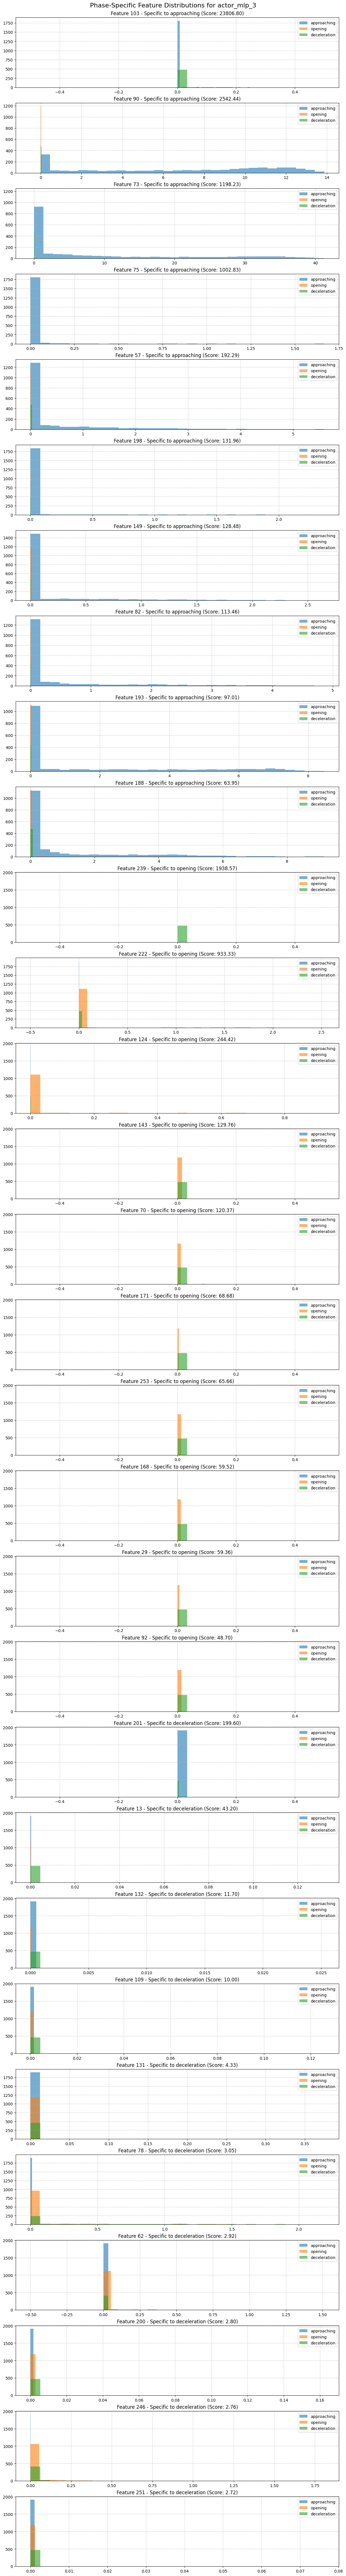

In [14]:
fig = visualizer.plot_feature_distributions(
    phase_distributions, 
    phase_specific_features,
    top_k=10
)